# ขั้นที่ 2: Explore data
เริ่มตรวจสอบข้อมูล พิจารณาว่าปัจจัยใดที่มีผลให้ผู้สมัครเลือกสมัครงานนั้นๆ เริ่มต้นจากการตั้งสมมติฐานว่า ผู้สมัครจะสมัครงานที่ต้องการทำเป็นอันดับแรก plot graph เพื่อทดสอบสมมติฐานที่ตั้งไว้

พิจารณาต่อที่คอลัมน์ "WantedPosition" ซึ่งเป็นชื่อตำแหน่งแบบ raw text มีคอลัมน์ที่ label ประเภทของงานเป็น JobCate และแบ่งย่อยลงไปอีกเป็น SubJobCate เราจึงนำข้อมูลมาเรียงดูว่าในแต่ละ label นั้นมีชื่อตำแหน่งงานใดเยอะที่สุด เป้าหมายก็คือการพยายามหา keyword ของแต่ละกลุ่มงาน จากนั้นสร้างไฟล์ .csv เพื่อเก็บไว้พิจารณาในขั้นตอนต่อไป

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [51]:
df = pd.read_csv("data/jobthai/df_noOutliers.csv", index_col='Unnamed: 0')

## สร้าง file excel เพื่อพิจารณาเบื้องต้น

In [54]:
age = pd.to_datetime('today').year - pd.to_datetime(df['BirthDate']).dt.year
age = age.fillna(0).astype(int)
df['age'] = age

In [56]:
df.columns.values

array(['ApplicantID', 'ApplicationID', 'PositionID', 'CompanyID',
       'AppliedDate', 'Gender', 'BirthDate', 'WantedPosition_1',
       'appJobCate_1', 'WantedPosition_2', 'appJobCate_2', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'WorkPlace',
       'appMinSalary', 'appMaxSalary', 'EduField', 'GradLevel_1',
       'GradSchool_1', 'GradField_1', 'GradDegree_1', 'GradCategory_1',
       'GradFaculty_1', 'GradLevel_2', 'GradSchool_2', 'GradField_2',
       'GradDegree_2', 'GradCategory_2', 'GradFaculty_2', 'GradLevel_3',
       'GradSchool_3', 'GradField_3', 'GradDegree_3', 'GradCategory_3',
       'GradFaculty_3', 'PrevPosition_1', 'PrevCategory_1', 'PrevLevel_1',
       'PrevDuty_1', 'PrevSalary_1', 'PrevPosition_2', 'PrevCategory_2',
       'PrevLevel_2', 'PrevDuty_2', 'PrevSalary_2', 'PrevPosition_3',
       'PrevCategory_3', 'PrevLevel_3', 'PrevDuty_3', 'PrevSalary_3',
       'appProvince', 'appAmphoe', 'appTambon', 'StartWorkYear',
       'WorkExperience', 'Pre

In [61]:
df['PrevSalary_1_ext'].head()

0        NaN
1    25000.0
2        NaN
3    35000.0
4    35000.0
Name: PrevSalary_1_ext, dtype: float64

In [68]:
#df = df.drop(['ApplicationID', 'ApplicantID', 'PositionID', 'CompanyID', 'AppliedDate], axis=1)
#df.head(100).to_csv('df_countOutliers100.csv', encoding='utf-8')

explore = df[['Gender','age','WantedPosition_1',
       'appJobCate_1', 'WantedPosition_2', 'appJobCate_2', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'WorkPlace',
       'appMinSalary', 'appMaxSalary', 'EduField', 'GradLevel_1','GradField_1','GradCategory_1',
              'GradLevel_2','GradField_2','GradCategory_2',
             'GradLevel_3','GradField_3','GradCategory_3',
             'PrevPosition_1', 'PrevDuty_1','PrevCategory_1','PrevSalary_1',
             'PrevPosition_2', 'PrevDuty_2','PrevCategory_2','PrevSalary_2',
             'PrevPosition_3', 'PrevDuty_3','PrevCategory_3','PrevSalary_3',
              'appTambon',
              'StartWorkYear',
       'WorkExperience', 'PrevSalary_1_ext', 'PrevSalary_2_ext',
       'PrevSalary_3_ext',
              'Title', 'Description', 'posJobCate',
       'posSubJobCate', 'Skill1', 'Skill2', 'Skill3', 'Skill4', 'Skill5',
       'Skill6', 'Skill7', 'Skill8', 'Skill9', 'Skill10', 'posSalary',
       'posMinSalary', 'posMaxSalary', 'PositionNumber','comTambon'
             ]]

In [70]:
explore.head(1000).to_excel('df_countOutliers100.xlsx','Sheet1')

In [64]:
df.shape

(510816, 85)

# Explore
---
## ผู้สมัครสมัครงานตรงกับงานที่อยากทำในอันดับแรกหรือไม่?
posJobCate กับ appJobCate_1 และ 2 มี unique value ไม่เหมือนกันอยู่ 11 งาน

In [41]:
def nosimilar_list(list1, list2):
    diffJob = []
    for i in range(0,len(list1)):        
        x = 0
        for j in range(0,len(list2)):
            if list1[i] == list2[j]:
                x = x+1
        if x == 0:
            #print(list1[i])
            diffJob.append(list1[i])
    diffJob.pop()
    return diffJob

In [4]:
#เช็ค unique values ของ posJobCate และ appJobCate_1
#df['posJobCate'].unique()
#df['appJobCate_1'].unique()

diffJob = nosimilar_list(df['appJobCate_1'].unique(),df['posJobCate'].unique())
print(diffJob)
print('\n')

diffJob = pd.Series(diffJob)
mainJobCate = df[df['appJobCate_1'].isin(diffJob) == False]
print('ดึงเฉพาะตัวอย่างที่มี unique value ของ appJobCate_1 ตรงกับ posJobCate')
print('------------------------------------------------------------')
print('จำนวน', mainJobCate.shape[0], 'ใบสมัคร')

['Law', 'Agriculture', 'Teacher', 'Other', 'HealthCare', 'MassComm', 'Writer', 'Acting', '41', 'Security', 'Debt_Collector']


ดึงเฉพาะตัวอย่างที่มี unique value ของ appJobCate_1 ตรงกับ posJobCate
------------------------------------------------------------
จำนวน 497469 ใบสมัคร


In [5]:
#drop ตัวอย่างที่มี missing values ออกไปก่อน
print('จำนวน Missing values')
print('--------------------')
print('จำนวน missing values ใน posJobCate: ', mainJobCate['posJobCate'].isnull().sum())
print('จำนวน missing values ใน appJobCate_1: ', mainJobCate['appJobCate_1'].isnull().sum())
print('\n')
mainJobCate = mainJobCate[~mainJobCate['appJobCate_1'].isnull()]

#เปรียบเทียบ posJobCate กับ appJobCate_1
compareJobCate = mainJobCate['posJobCate'] == mainJobCate['appJobCate_1']
match, nomatch = compareJobCate.value_counts()
print('จำนวนผู้สมัครที่สมัครตรงและไม่ตรงกับกลุ่มงานที่ต้องการ')
print('--------------------------------------')
print('สมัครตรงกับกลุ่มงานที่ต้องการ:', match, 'ใบ')
print('สมัครไม่ตรงกับกลุ่มงานที่ต้องการ:', nomatch, 'ใบ')

จำนวน Missing values
--------------------
จำนวน missing values ใน posJobCate:  0
จำนวน missing values ใน appJobCate_1:  5


จำนวนผู้สมัครที่สมัครตรงและไม่ตรงกับกลุ่มงานที่ต้องการ
--------------------------------------
สมัครตรงกับกลุ่มงานที่ต้องการ: 290353 ใบ
สมัครไม่ตรงกับกลุ่มงานที่ต้องการ: 207111 ใบ


In [6]:
#ฟังก์ชันที่ใช้สำหรับการ plot graph ด้านล่าง
def count_to_df(_,JobCate):
    # Input: result from value_counts()
    # Output: dataframe
    
    _ = _.reset_index()
    _.columns=[JobCate, 'count']
    _ = pd.DataFrame(_)
    
    return _

def plot_count(_,JobCate):
    ax = sns.barplot(x=JobCate, y='count', data=x)

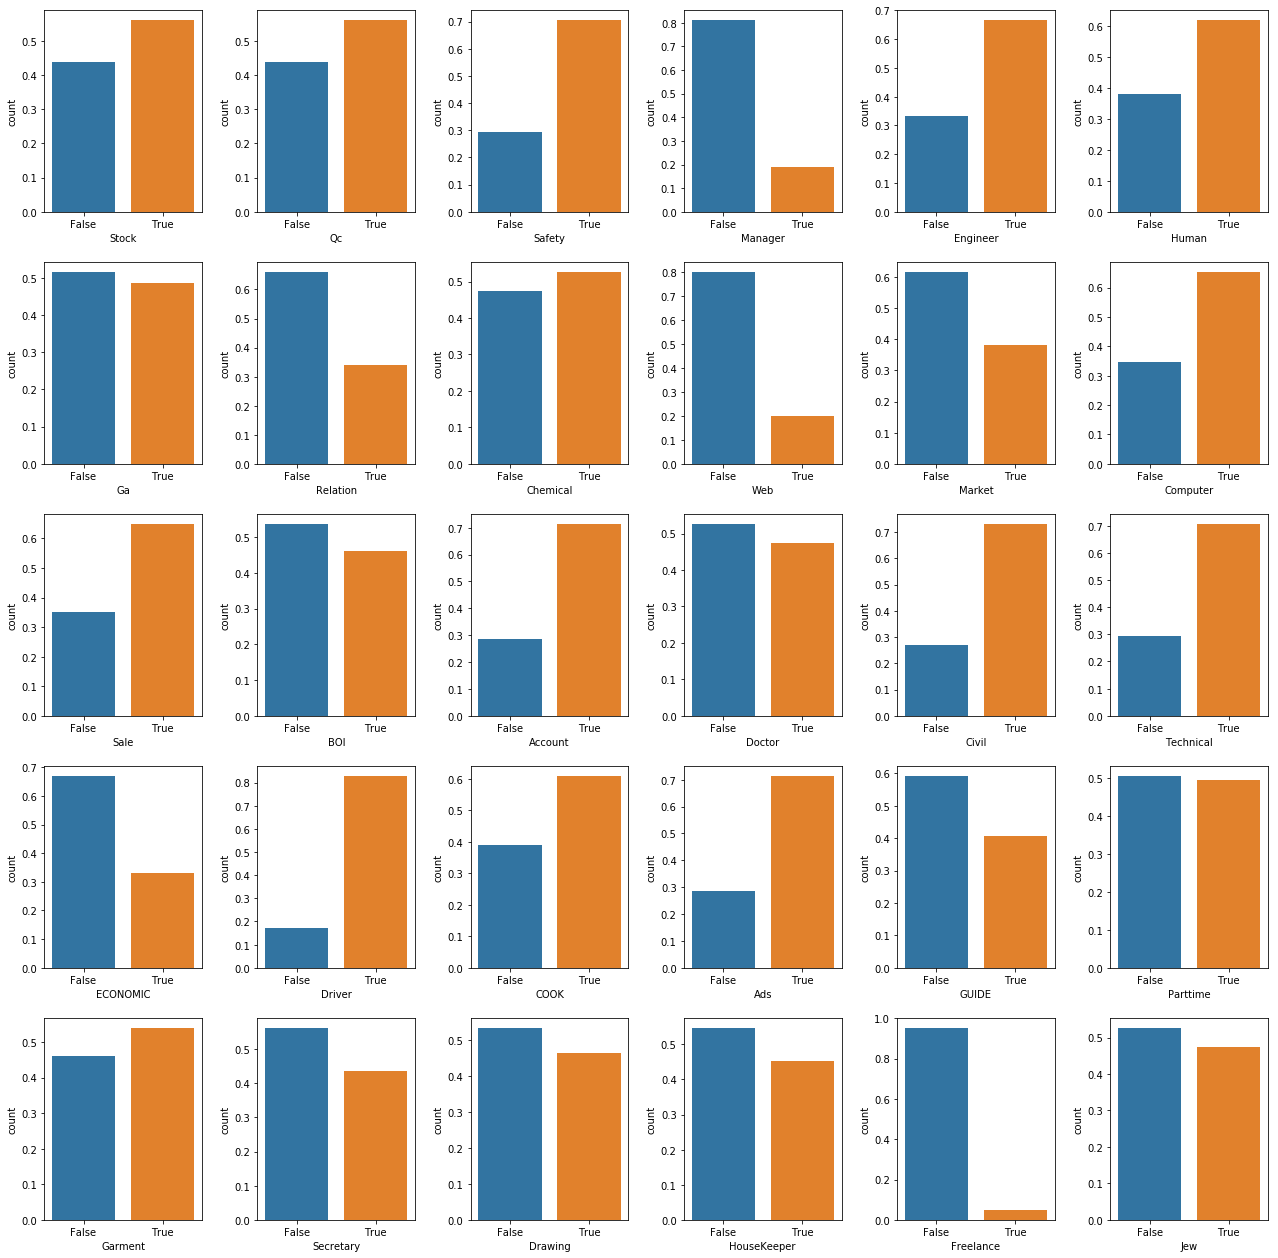

In [7]:
#ค่า i สำหรับใช้กับ subplot
i=1
plt.figure(figsize=[20,20])
for job in mainJobCate['appJobCate_1'].unique():
    #สร้าง dataframe สำหรับแต่ละ JobCate
    appJobCate = mainJobCate[mainJobCate['appJobCate_1'] == job]
    #เปรียบเทียบ posJobCate กับ appJobCate_1
    compare = appJobCate['appJobCate_1'] == appJobCate['posJobCate']
    #count value, ใส่ค่า True เพื่อให้ returnออกมาเป็น relative frequency
    x = count_to_df(compare.value_counts(True), job)
    #สร้างเป็น subplot
    plt.subplot(5,6,i)
    plot_count(x, job)
    i = i+1
    #ปรับระยะระหว่างกราฟ
    #plt.subplots_adjust(top=0.92, bottom=0.6, left=0.10, right=1.2, hspace=0.25, wspace=0.35)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

## งานในแต่ละอาชีพคืออะไรบ้าง

In [8]:
#viewJob = df[['WantedPosition_1','appJobCate_1','WantedPosition_2','appJobCate_2','Title','posJobCate' ]]

In [9]:
#Load applicant dataframe ขึ้นมาใหม่เนื่องจาก df เป็น dataframe สำหรับใบสมัครจะมีผู้สมัครเกิดขึ้นซ้ำกันตามจำนวนครั้งที่สมัคร
applicant = pd.read_csv("data/jobthai/applicant_df.csv")

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,6,22,26,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#หาเฉพาะ ApplicantID ที่มีอยู่ใน df
appSameID = applicant[applicant['ApplicantID'].isin(df['ApplicantID']) == True]
#ต่อ WantedPosition_1 ที่อยู่ใน JobCate_1 เดียวกันให้เป็น list
groupJob = appSameID.groupby('JobCate_1')['WantedPosition_1'].apply(list)

In [11]:
appJobDetail = pd.DataFrame()
for i in range(0, groupJob.shape[0]):
    appJobDetail[i] = pd.Series(groupJob[i]).value_counts().reset_index()['index']
appJobDetail.columns = groupJob.index

In [12]:
#Save เป็น file .csv
#appjobDetail.to_csv('appJobDetail.csv', encoding='utf-8')

## ใส่ SubJobCate ให้กับรายละเอียดงานฝั่งผู้สมัคร (ซึ่งจะมีเฉพาะ 30 งานที่ตรงกันเท่านั้น)

In [13]:
#Load position dataframe ขึ้นมาใหม่เนื่องจาก df เป็น dataframe สำหรับใบสมัครจะมีตำแหน่งงานเกิดขึ้นซ้ำกันตามจำนวนครั้งที่มีคนสมัคร
position = pd.read_csv("data/jobthai/position_df.csv")

In [14]:
#หาเฉพาะ PositionID ที่มีอยู่ใน df
posSameID = position[position['PositionID'].isin(df['PositionID']) == True]

#นำเฉพาะ PositionID ที่ทั้งในใบสมัครและตำแหน่งมานับหา 'Title' ที่ซ้ำกันมากที่สุด 20 อันดับ
posSameID['FullJob'] = posSameID['JobCate']  + ' > ' + posSameID['SubJobCate']
fullJobIndex = pd.Series(posSameID['FullJob'].unique()).sort_values()
titleGroup = pd.DataFrame()
for job in fullJobIndex:
    x = posSameID[posSameID['FullJob'] == job]
    titleGroup[job] = pd.Series(x['Title'].value_counts()[:20].index)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
#Save เป็น file .csv
#titleGroup.to_csv('posJobDetail.csv', encoding='utf-8')